In [1]:
import os

import matplotlib.pyplot as plt
from ocelot.adaptors.astra2ocelot import astraBeam2particleArray
from ocelot.gui.beam_plot import show_density, show_e_beam

### Setup

Convert ASTRA beam to `.sdds` for ELEGANT.

A copy of the lattice has been manually created in `ares_ea.lte`. ELEGANT run instructions have been manually written in `ares_ea_elegant.ele`.

In [2]:
# Check that ELEGANT and SDDS are in PATH
os.environ["PATH"]

'/usr/local/Caskroom/miniconda/base/envs/rl39/bin:/usr/local/Caskroom/miniconda/base/envs/rl39/bin:/usr/local/Caskroom/miniconda/base/condabin:/Users/jankaiser/Documents/DESY/elegant/sdds:/Users/jankaiser/Documents/DESY/elegant/oagtcltk/usr/bin:/Users/jankaiser/Documents/DESY/elegant/darwin-x86:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin:/Library/Apple/usr/bin'

In [3]:
# Convert ASTRA beam to .sdds for ELEGANT
astra_file_in = "ACHIP_EA1_2021.1351.001"
sdds_file_in = f"{astra_file_in}.sdds"

if os.system(f"astra2elegant {astra_file_in} {sdds_file_in}"):
    print("Failed!")
else:
    print("Success!")

Success!


In [4]:
if os.system(f"elegant2astra {sdds_file_in} ACHIP_EA1_2021.1351.001_sdds_and_back.astra"):
    print("Failed!")
else:
    print("Success!")

Success!


Astra to Ocelot: charge =  5.000000000001694e-13  C
Astra to Ocelot: particles number =  100000
Astra to Ocelot: energy =  0.10731590244355117  GeV
Astra to Ocelot: s pos =  13.50890653269  m


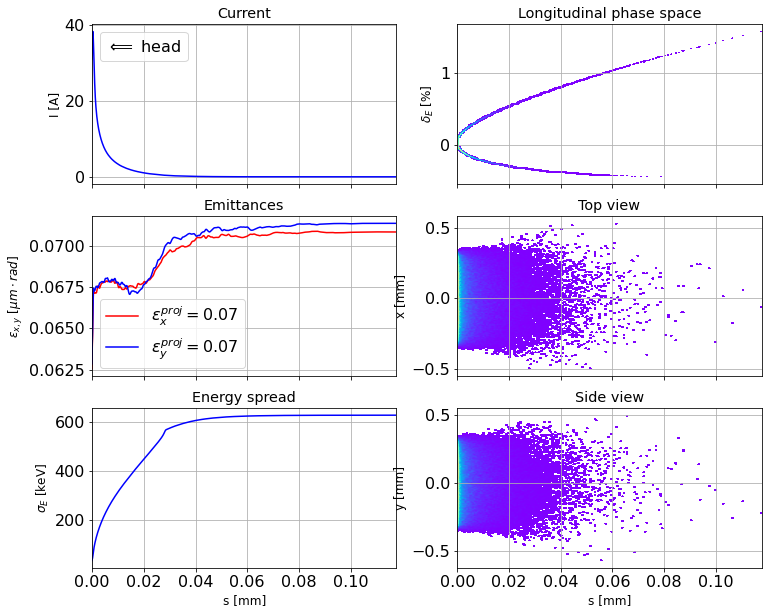

Astra to Ocelot: charge =  -5.000050000001694e-13  C
Astra to Ocelot: particles number =  100001
Astra to Ocelot: energy =  0.10736121608775794  GeV
Astra to Ocelot: s pos =  13.551  m


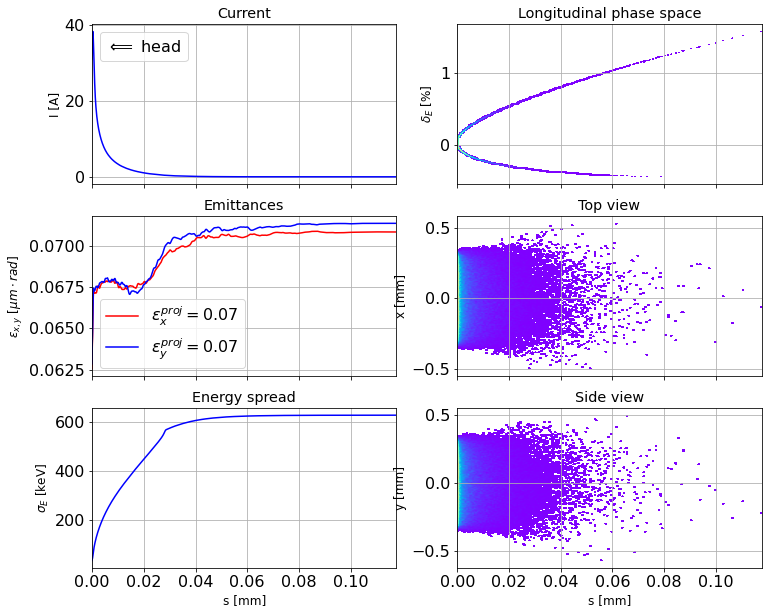

In [5]:
# Check if the ASTRA beam looks the same after conversion to .sdds and then back again

p_array_in = astraBeam2particleArray(astra_file_in)
show_e_beam(p_array_in, figsize=(12,10))
plt.show()

p_array_in_and_back = astraBeam2particleArray("ACHIP_EA1_2021.1351.001_sdds_and_back.astra")
show_e_beam(p_array_in, figsize=(12,10))
plt.show()

### Run ELEGANT with 100k macroparticles

In [6]:
ele_file = "ares_ea_elegant.ele"

In [7]:
%%timeit
os.system(f"elegant {ele_file}")

Running elegant at Tue May 24 10:37:37 2022

This is elegant 2021.4.0, Mar  3 2022, by M. Borland, J. Calvey, M. Carla', N. Carmignani, AJ Dick, Z. Duan, M. Ehrlichman, L. Emery, W. Guo, R. Lindberg, V. Sajaev, R. Soliday, Y.-P. Sun, C.-X. Wang, Y. Wang, Y. Wu, and A. Xiao.
Thanks for using elegant.  Please cite the following reference in your publications:
  M. Borland, "elegant: A Flexible SDDS-Compliant Code for Accelerator Simulation,"
  Advanced Photon Source LS-287, September 2000.
If you use a modified version, please indicate this in all publications.
Link date: Mar  3 2022 14:16:16, SVN revision: 28201M
statistics:    ET:     00:00:00 CP:    0.00 BIO:0 DIO:0 PF:0 MEM:0
&run_setup
    lattice = ares_ea.lte,
    use_beamline = ea,
    rootname = {NULL},
    output = %s.sdds,
    centroid = {NULL},
    bpm_centroid = {NULL},
    sigma = {NULL},
    final = {NULL},
    acceptance = {NULL},
    losses = {NULL},
    losses_include_global_coordinates = 0,
    losses_s_limit[0] = -1.7

### Check result

In [8]:
sdds_file_out = "ares_ea_elegant.sdds"
astra_file_out = f"{sdds_file_out[:-5]}.astra"

if os.system(f"elegant2astra {sdds_file_out} {astra_file_out}"):
    print("Failed!")
else:
    print("Success!")

Success!


In [9]:
p_array_out = astraBeam2particleArray(astra_file_out)

Astra to Ocelot: charge =  -5.000050000001694e-13  C
Astra to Ocelot: particles number =  100001
Astra to Ocelot: energy =  0.10735121620103916  GeV
Astra to Ocelot: s pos =  15.719  m


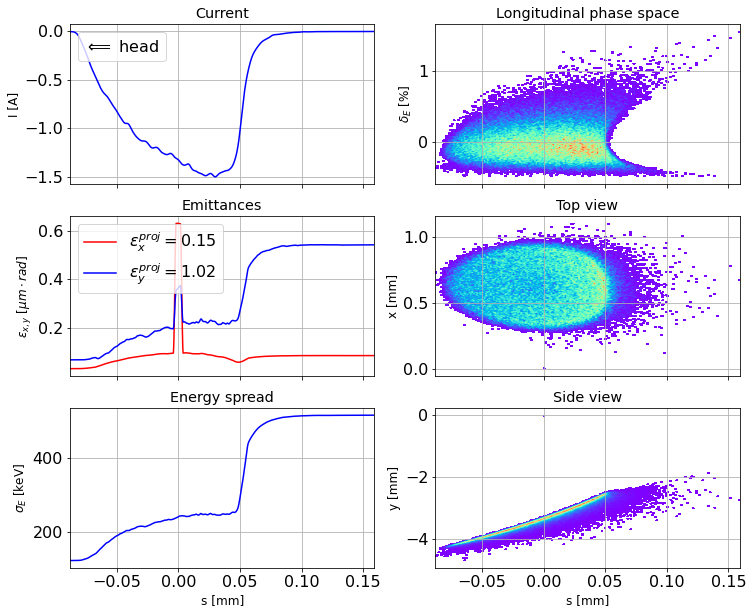

In [10]:
show_e_beam(p_array_out, figsize=(12,10))
plt.show()

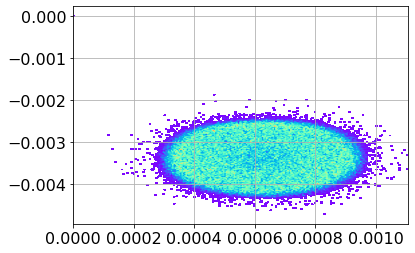

In [11]:
show_density(p_array_out.x(), p_array_out.y())
plt.show()

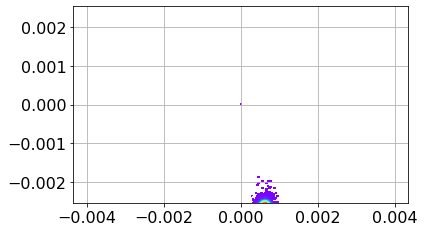

In [12]:
screen_resolution = (2448, 2040)
meter_per_pixel = (3.5488e-6, 2.5003e-6)

show_density(p_array_out.x(), p_array_out.y(), limits=[(-screen_resolution[0] * meter_per_pixel[0] / 2,
                                                         screen_resolution[0] * meter_per_pixel[0] / 2),
                                                       (-screen_resolution[1] * meter_per_pixel[1] / 2,
                                                         screen_resolution[1] * meter_per_pixel[1] / 2)])
plt.gca().set_aspect("equal")
plt.show()